In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
import numpy as np
import matplotlib.pylab as plt

### Генерация данных

In [2]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2,
                                                      n_classes=3, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

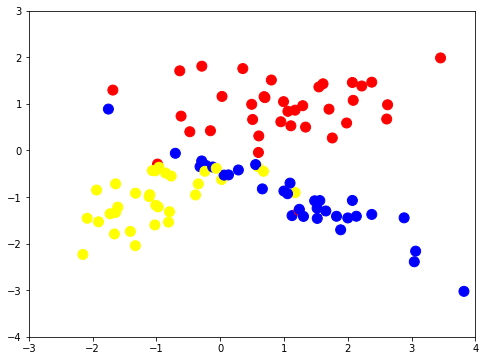

In [3]:
plt.figure(figsize=(8,6))
plt.xlim(-3,4)
plt.ylim(-4,3)
plt.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), c=classification_problem[1], cmap=colors, s=100)

### Разбиение на тренировку и тест

In [4]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], classification_problem[1], test_size=.3, random_state=1)

### Модель DecisionTreeClassifier

In [5]:
dtc = tree.DecisionTreeClassifier(random_state=1)
dtc.fit(train_data, train_labels)
print('Accuracy', metrics.accuracy_score(test_labels, dtc.predict(test_data)))

Accuracy 0.7666666666666667


### Разделяющая поверхность

In [14]:

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels,
                          colors=colors, light_colors=light_colors):
    def mesh_grid(data, step=.05, border=.5):
        x_min, x_max = data[:,0].min() - border, data[:,0].max() + border
        y_min, y_max = data[:,1].min() - border, data[:,1].max() + border
        return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    estimator.fit(train_data, train_labels)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    xx, yy = mesh_grid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx,yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:,0], test_data[:,1], c=test_labels, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

<ipython-input-14-8adc992a45a4>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy, mesh_predictions, cmap=light_colors)
<ipython-input-14-8adc992a45a4>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


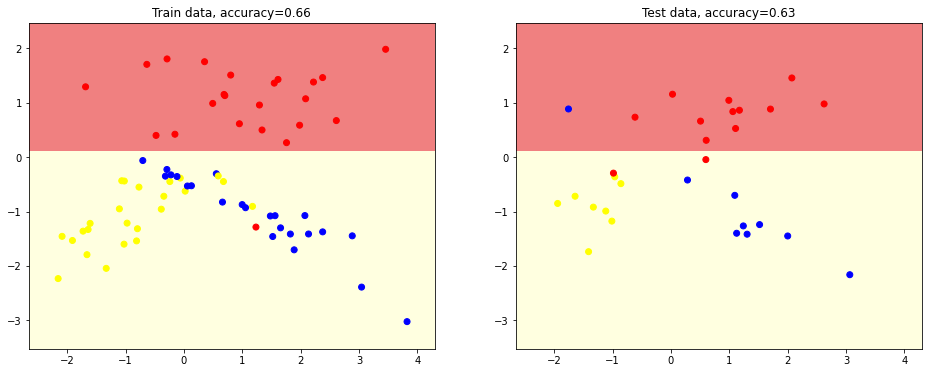

In [15]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

<ipython-input-14-8adc992a45a4>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy, mesh_predictions, cmap=light_colors)
<ipython-input-14-8adc992a45a4>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


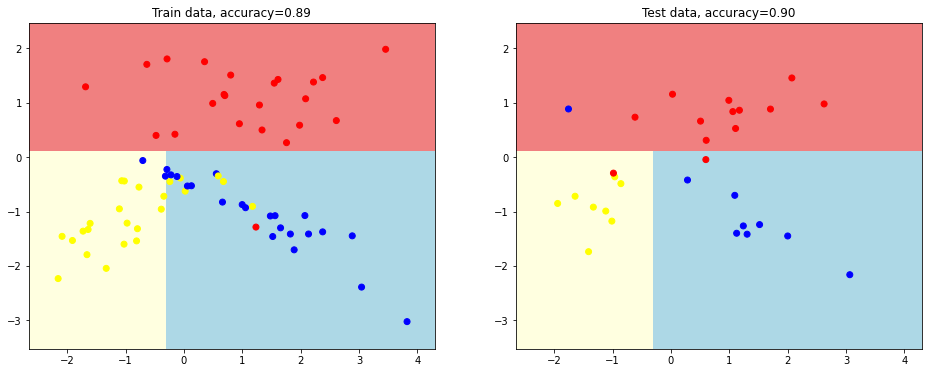

In [16]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

<ipython-input-14-8adc992a45a4>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy, mesh_predictions, cmap=light_colors)
<ipython-input-14-8adc992a45a4>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


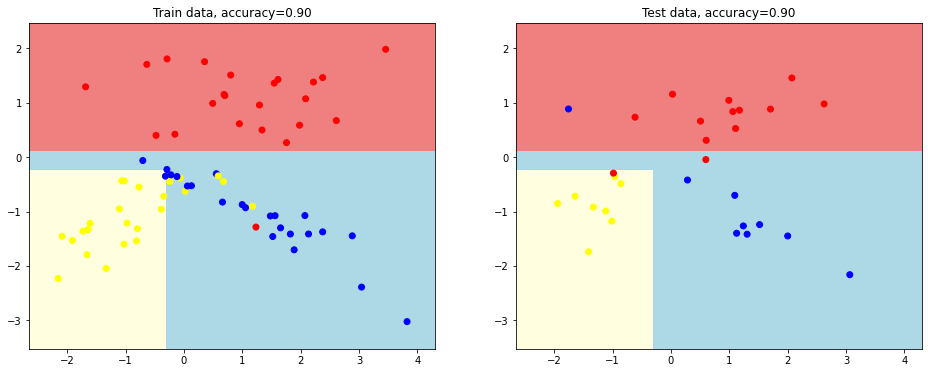

In [17]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Параметр min_samples_leaf - позволяет задать количество объектов на ветви после достижения которого ветвление прекращается

<ipython-input-14-8adc992a45a4>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy, mesh_predictions, cmap=light_colors)
<ipython-input-14-8adc992a45a4>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


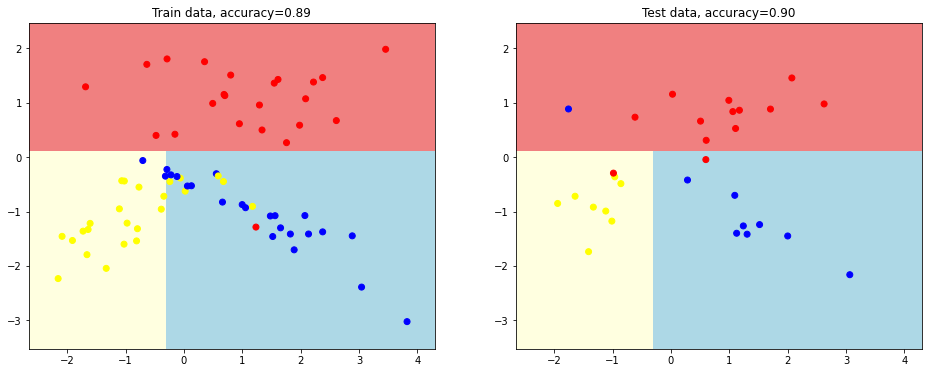

In [21]:
estimator = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=6)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)